# Week 4 Lab linear regression and beyond
 - training error and test error
 - model complexity
 - bias and variance
 - different data lead to different model parameters

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

In [54]:
data = pd.read_csv('Advertising.csv')

In [55]:
x_tv = data.loc[:,['TV']].values

y_sales = data.loc[:,['Sales']].values

In [56]:
import random

random.seed(100)

idx = random.sample(range(200),160)

x_train = x_tv[idx]
y_train = y_sales[idx]

x_test = [x_tv[i] for i in range(200) if i not in idx]
y_test = [y_sales[i] for i in range(200) if i not in idx]

In [57]:
X_seq = np.linspace(x_tv.min(),x_tv.max(),300).reshape(-1,1)

## Reviewing pandas and sklearn: apply linear regression to (tv, sales), (radio, sales), and (newspaper, sales)

Text(0, 0.5, 'Sales')

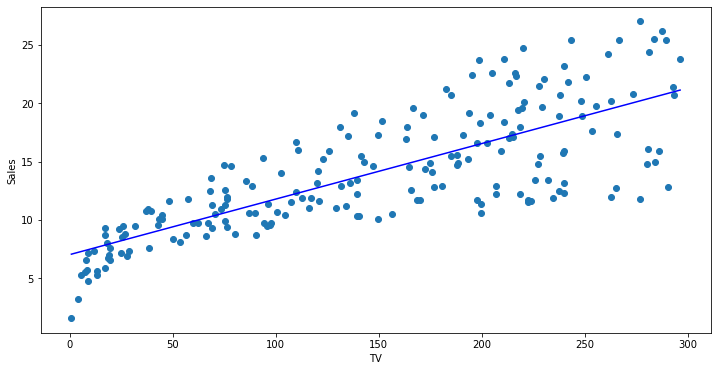

In [58]:
plt.scatter(x_tv, y_sales)

regr = skl_lm.LinearRegression()

regr.fit(x_tv,y_sales)

y_pred_seq = regr.predict(X_seq)

plt.plot(X_seq, y_pred_seq,'b-')
plt.xlabel('TV')
plt.ylabel('Sales')

In [59]:
regr.coef_, regr.intercept_

(array([[0.04753664]]), array([7.03259355]))

Text(0, 0.5, 'Sales')

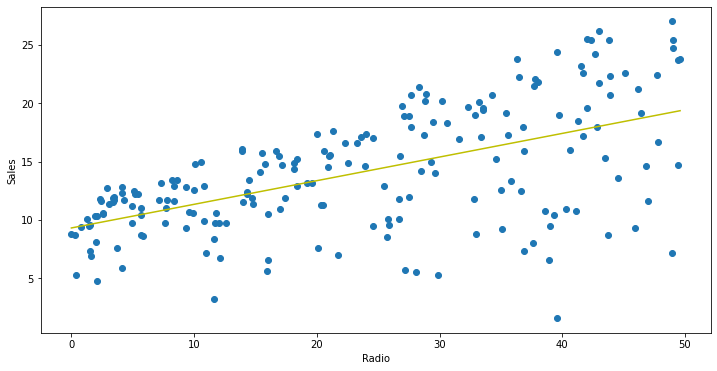

In [60]:
x_radio = data.loc[:,['Radio']].values

regr_radio = skl_lm.LinearRegression()
regr_radio.fit(x_radio, y_sales)

X_seq_radio = np.linspace(x_radio.min(),x_radio.max(),300).reshape(-1,1)

y_pred_radio = regr_radio.predict(X_seq_radio)

plt.scatter(x_radio,y_sales)
plt.plot(X_seq_radio, y_pred_radio, 'y-')
plt.xlabel('Radio')
plt.ylabel('Sales')

In [61]:
regr_radio.coef_, regr_radio.intercept_

(array([[0.20249578]]), array([9.3116381]))

Text(0, 0.5, 'Sales')

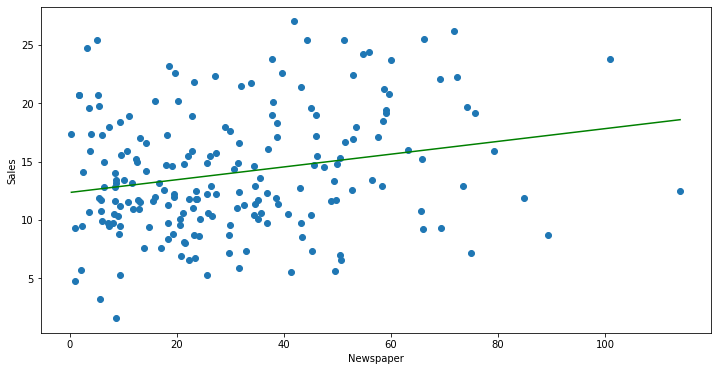

In [62]:
x_news = data.loc[:,['Newspaper']].values

regr_news = skl_lm.LinearRegression()
regr_news.fit(x_news, y_sales)

X_seq_news = np.linspace(x_news.min(),x_news.max(),300).reshape(-1,1)

y_pred_news = regr_news.predict(X_seq_news)

plt.scatter(x_news,y_sales)
plt.plot(X_seq_news, y_pred_news, 'g-')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [63]:
regr_news.coef_, regr_news.intercept_

(array([[0.0546931]]), array([12.35140707]))

### We can generate a new training set by sampling a new random idx 

In [64]:
idx1 = random.sample(range(200),160)

x_train1 = x_tv[idx1]
y_train1 = y_sales[idx1]

In [65]:
regr1 = skl_lm.LinearRegression()

regr1.fit(x_train1, y_train1)

y_pred_seq1 = regr1.predict(X_seq)

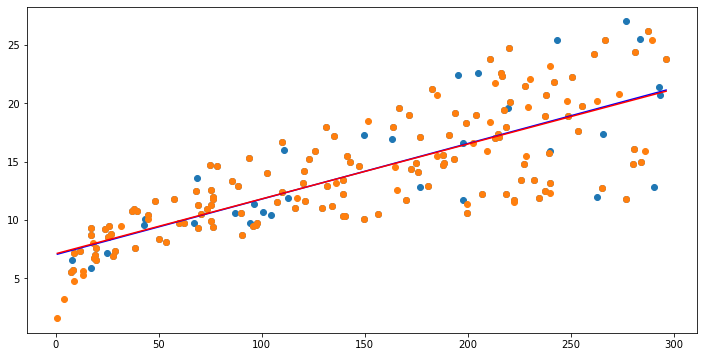

In [66]:
plt.scatter(x_train, y_train)
plt.scatter(x_train1, y_train1)

plt.plot(X_seq, y_pred_seq,'b-')
plt.plot(X_seq, y_pred_seq1,'r-')

## Given a data set, we can generate many different training and test sets by resampling, which is call the technique of "bootstrapping". Different training sets lead to different slope and intercept. So just like the homework FrogJump, we can do a simulation by fitting models with different training sets, and see the distribution of the model parameters (slope and intercept)

In [67]:
m_list = []
b_list = []

linear_model = skl_lm.LinearRegression()

for i in range(500):
    idx = random.sample(range(200),160)
    Xb = x_tv[idx]
    yb = y_sales[idx]
    linear_model.fit(Xb,yb)
    m_list.append(linear_model.coef_)
    b_list.append(linear_model.intercept_)

/Users/felix/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

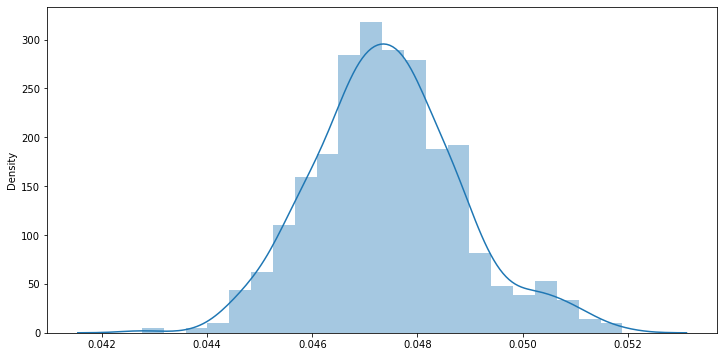

In [68]:
import seaborn as sns

sns.distplot(m_list)

In [69]:
print(np.mean(m_list), np.std(m_list))

0.0474348697630429 0.0014079599492549707


/Users/felix/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

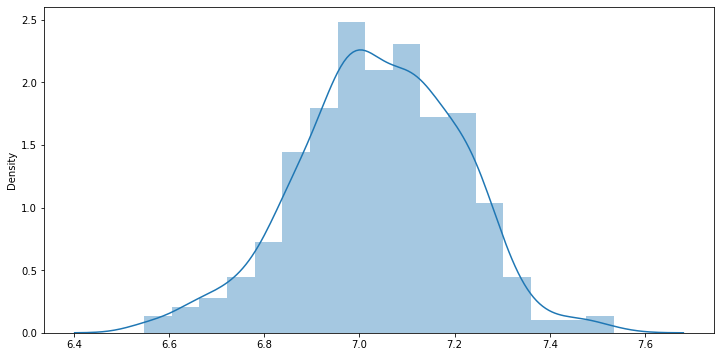

In [70]:
sns.distplot(b_list)

In [71]:
print(np.mean(b_list), np.std(b_list))

7.039971398313073 0.16875797091137015


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [73]:
from sklearn.metrics import mean_squared_error

## Model complexity. Increase the complexity by using higher order polynomial
$$ y = f(x) = a_1x+ a_2x^2 + \cdots + a_nx^n + b$$
### In linear model, the model is: 
$$f(x) = a_1x + b$$ 
### The next model with more complexity is: 
$$f(x) = a_1x+a_2x^2+b$$

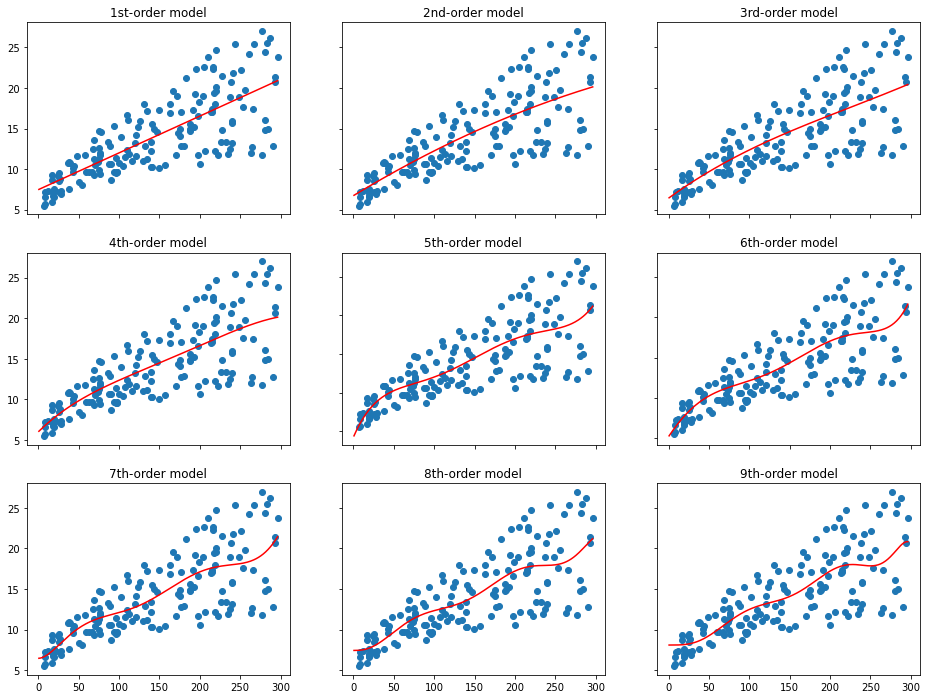

In [74]:
#plt.scatter(x_train, y_train)

test_error = []
train_error = []
complexity = []

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(16,12))

ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

for i, ax in zip(range(9),fig.get_axes()):
    degree = 1+i
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(x_train, y_train)
    y_seq_pred = model.predict(X_seq)
    ax.scatter(x_train, y_train)
    ax.plot(X_seq,y_seq_pred,'r-')
    ax.set_title('{}-order model'.format(ordinal(i+1)))
    #ax.title('f model: T=%i' %i)
    ax.label_outer()
    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_error.append(mean_squared_error(y_train,y_pred_train))
    test_error.append(mean_squared_error(y_test,y_pred_test))
    
    complexity.append(degree)
    

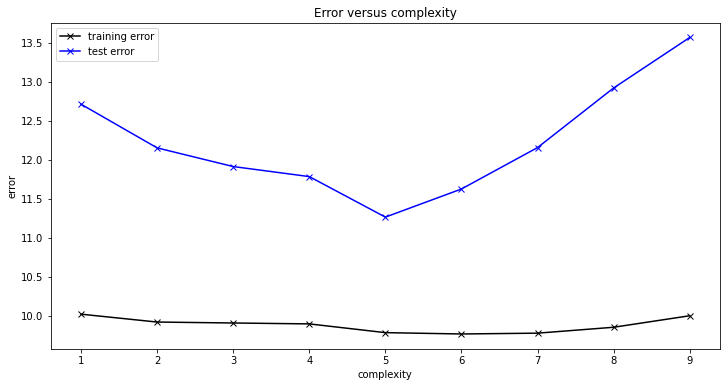

In [77]:
#plt.figsize(12,16)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(complexity, train_error, 'k-x', label='training error')
plt.plot(complexity, test_error, 'b-x', label = 'test error')
plt.title('Error versus complexity')
plt.xlabel('complexity')
plt.ylabel('error')
plt.legend()

### If you are the owner of a data science company, and you are presented the analysis of above models and the training error and test error. Which model, i.e. which polynomial order, will you choose for predicting the sales for next year. Answer this question briefly in Blackboard quiz.